<a href="https://colab.research.google.com/github/sulaksh26/Customer_Churn_Prediction/blob/main/TF18_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline


In [ ]:
path='/content/drive/MyDrive/TF_Datasets/Telco_Customer-Churn.csv'

df = pd.read_csv(path)
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5335,3327-YBAKM,Female,0,Yes,No,64,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,One year,Yes,Mailed check,96.90,6314.35,No
5744,1371-WEPDS,Male,1,Yes,No,40,Yes,No,DSL,No,...,No,No,No,Yes,One year,No,Electronic check,55.80,2283.3,No
2818,4831-EOBFE,Male,0,Yes,Yes,29,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,No,Credit card (automatic),94.65,2649.15,Yes
6533,1104-TNLZA,Male,1,Yes,No,28,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.80,2998,No
5892,2709-UQGNP,Male,0,No,No,10,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,51.65,524.5,No


In [ ]:
df.drop('customerID',axis='columns',inplace=True)

In [ ]:
df.dtypes
#Quick glance at above makes me realize that TotalCharges should be float but it is an object. Let's check what's going on with this column

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.TotalCharges.values


array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
#Above values are strings we will convert them into numbers

pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [ ]:
#some values seems to be not numbers but blank string. Let's find out such rows
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df.shape

(7043, 20)

In [ ]:
df.iloc[488].TotalCharges

' '

In [ ]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [ ]:
#Remove rows with space in TotalCharges
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [ ]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

<ipython-input-14-01816c9a1a9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [ ]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [ ]:
df1.TotalCharges.dtypes

dtype('float64')

In [ ]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

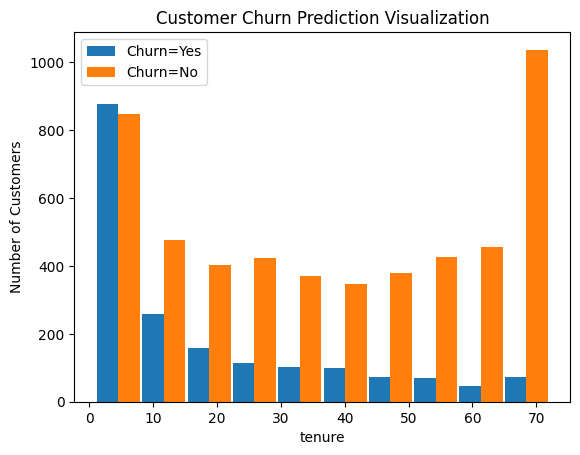

In [ ]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]




plt.hist([tenure_churn_yes,tenure_churn_no],rwidth=0.95,label=['Churn=Yes','Churn=No'])
plt.legend()

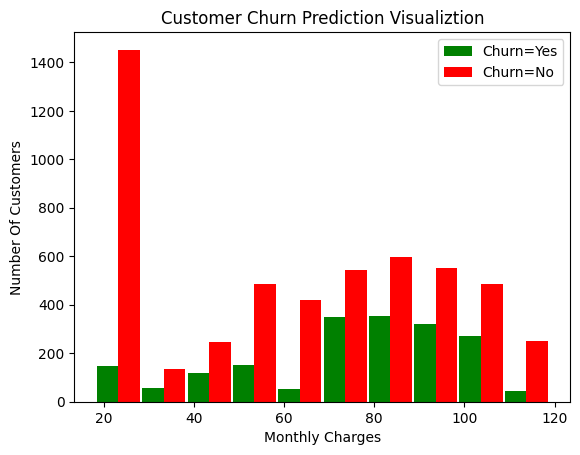

In [ ]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [ ]:
#Many of the columns are yes, no etc. Let's print unique values in object columns to see data values

In [ ]:
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes=='object':
      print(f'{column}:{df[column].unique()}')

In [ ]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [ ]:
#Some of the columns have no internet service or no phone service, that can be replaced with a simple No
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

<ipython-input-23-539a337f380f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
<ipython-input-23-539a337f380f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [ ]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [ ]:
#Convert Yes and No to 1 or 0 as machine doesnt understand words but numbers
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
  df1[col].replace({'Yes':1,"No":0},inplace=True)

<ipython-input-25-9b03650b1ed6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,"No":0},inplace=True)


In [ ]:
for col in df1:
  print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [ ]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-27-ba153b6b6960>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [ ]:
df1.gender.unique()

array([1, 0])

In [ ]:
#One hot encoding for categorical columns
#This converts three or more values into zeros and ones by only puttting one against the certain column for eg if there is single column which can have values a,b,c then it seperates them into a,b,c and puts 0 or 1 accordingly


df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns
#Here InternetService is divided

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3844,1,0,0,0,35,1,1,1,0,1,...,1,0,0,0,1,0,0,1,0,0
2501,0,0,1,1,72,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
6011,1,0,1,1,37,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
6433,1,0,1,1,58,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
320,1,1,0,0,54,1,1,1,1,0,...,1,0,0,0,1,0,1,0,0,0


In [ ]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [ ]:
#Scaling

cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()


df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [ ]:
for col in df2:
  print(f'{col}:{df2[col].unique()}')


gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [ ]:
#Train Test Split

In [ ]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']
#test_size=0.2 means 80% for training and 20% for testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
X_train.shape
#80%

(5625, 26)

In [ ]:
X_test.shape
#20%

(1407, 26)

In [ ]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [ ]:
len(X_train.columns)

26

In [ ]:
#build a model (ANN) in tensorflow/keras

import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5067 - accuracy: 0.7477
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4303 - accuracy: 0.7899
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.7979
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4172 - accuracy: 0.8034
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8043
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8076
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8082
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8069
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.8091
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4053 - accura

In [ ]:
model.evaluate(X_test,y_test)
#Accuracy-78%

44/44 [==============================] - 0s 1ms/step - loss: 0.5156 - accuracy: 0.7619


[0.5156336426734924, 0.761904776096344]

In [ ]:
yp=model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 1ms/step


array([[0.32582814],
       [0.5373351 ],
       [0.00366915],
       [0.80282533],
       [0.45244047]], dtype=float32)

In [ ]:
y_pred=[]
for element in yp:
  if element>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
y_pred[:10]
#78% accurate

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [ ]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       999
           1       0.62      0.46      0.53       408

    accuracy                           0.76      1407
   macro avg       0.71      0.67      0.68      1407
weighted avg       0.75      0.76      0.75      1407



Text(95.72222222222221, 0.5, 'Truth')

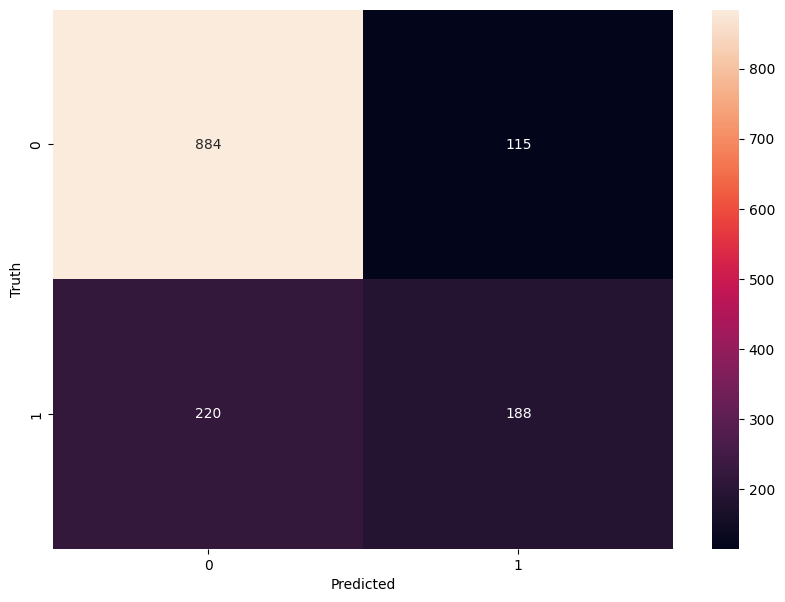

In [ ]:
import seaborn as sn

cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))

sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_test.shape

(1407,)

In [ ]:
#Accuracy

round((859+247)/(859+247+140+161),2)

0.79

In [ ]:
#Precision for 0 class. i.e. Precision for customers who did not churn
round(859/(859+161),2)

0.84

In [ ]:
#Precision for 1 class. i.e. Precision for customers who actually churned
round(247/(247+140),2)

0.64

In [ ]:
#Recall for 0 class

round(859/(859+140),2)

0.86

In [ ]:
#Recall for 1 class
round(247/(247+161),2)

0.61

In [ ]:
#TF_21

In [ ]:
from tensorflow import losses

In [ ]:
def ANN(X_train,y_train,X_test,y_test,loss,weights):
  model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
  ])


  model.compile(optimizer='adam',
              loss=loss,
              metrics=['accuracy'])


  if weights==-1:
    model.fit(X_train,y_train,epochs=100)
  else:
    model.fit(X_train,y_train,epochs=100,class_weight=weights)

  print(model.evaluate(X_test,y_test))

  y_pred=model.predict(X_test)
  y_pred=np.round(y_pred)


  print("Classification Report:",classification_report(y_test,y_pred))


  return y_pred

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4726 - accuracy: 0.7748
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4206 - accuracy: 0.7979
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8027
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.8094
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8068
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8050
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 0.8071
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.8112
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.8108
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4019 - accura

In [ ]:
#Under Sampling

In [ ]:
#In the above result we can see f1 value for 1 is very low so to improve it we use under samplin

In [ ]:
#Class count
count_class_0,count_class_1=df1.Churn.value_counts()

#Divide by class

df_class_0=df2[df2['Churn']==0]
df_class_1=df2[df2['Churn']==1]

In [ ]:
df_class_0.shape

(5163, 27)

In [ ]:
df_class_1.shape

(1869, 27)

In [ ]:
df_class_0.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5473,0,0,1,1,0.267606,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
5974,0,0,1,1,0.126761,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0


In [ ]:
count_class_0,count_class_1

(5163, 1869)

In [ ]:
df_class_0_under=df_class_0.sample(count_class_1)

df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)

print("Random under-sampling:")
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [ ]:
X1=df_test_under.drop('Churn',axis='columns')
Y1=df_test_under['Churn']


from sklearn.model_selection import  train_test_split

X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.2,random_state=1,stratify=Y1)
#stratify helps in ensuring that datasets are equal in quantity

In [ ]:
Y1_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [ ]:
y_pred_under=ANN(X1_train,Y1_train,X1_test,Y1_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 2s 3ms/step - loss: 0.5954 - accuracy: 0.6870
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5059 - accuracy: 0.7615
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4896 - accuracy: 0.7696
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4831 - accuracy: 0.7666
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4762 - accuracy: 0.7742
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4737 - accuracy: 0.7712
Epoch 7/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4699 - accuracy: 0.7732
Epoch 8/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4709 - accuracy: 0.7746
Epoch 9/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4665 - accuracy: 0.7722
Epoch 10/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4638 - accuracy: 0.7779
Epoch 11/

In [ ]:
#heck classification report above. f1-score for minority class 1 improved from 0.57 to 0.77. Score for class 0 reduced to 0.75 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

In [ ]:
#Check classification report above. f1-score for minority class 1 improved from 0.57 to 0.76. Score for class 0 reduced to 0.75 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

In [ ]:
#OverSampling


In [ ]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [ ]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

In [ ]:
# Number of classes in training Data
y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [ ]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 4ms/step - loss: 0.5530 - accuracy: 0.7167
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4979 - accuracy: 0.7534
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4899 - accuracy: 0.7582
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4852 - accuracy: 0.7591
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4815 - accuracy: 0.7584
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4781 - accuracy: 0.7654
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4760 - accuracy: 0.7666
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4723 - accuracy: 0.7662
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4714 - accuracy: 0.7691
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4677 - accura

In [ ]:
#Check classification report above. f1-score for minority class 1 improved from 0.57 to 0.80. Score for class 0 reduced to 0.75 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

In [ ]:
#SMOTE

In [ ]:
pip install imbalanced-learn

In [ ]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2,random_state=15, stratify=y_sm)

In [ ]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 3s 5ms/step - loss: 0.5271 - accuracy: 0.7447
Epoch 2/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4677 - accuracy: 0.7766
Epoch 3/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4590 - accuracy: 0.7840
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4549 - accuracy: 0.7833
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4507 - accuracy: 0.7874
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.7877
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.7913
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4412 - accuracy: 0.7953
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4371 - accuracy: 0.7962
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4348 - accura

In [ ]:
#SMOTE Oversampling increases f1 score of minority class 1 from 0.57 to 0.81 (huge improvement) Also over all accuracy improves from 0.78 to 0.81

In [ ]:
#Use of ensemble with undersampling

In [ ]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [ ]:
'''
model1 --> class1(1495) + class0(0, 1495)

model2 --> class1(1495) + class0(1496, 2990)

model3 --> class1(1495) + class0(2990, 4130)
'''

'\nmodel1 --> class1(1495) + class0(0, 1495)\n\nmodel2 --> class1(1495) + class0(1496, 2990)\n\nmodel3 --> class1(1495) + class0(2990, 4130)\n'

In [ ]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [ ]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [ ]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train

In [ ]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)



Epoch 1/100
94/94 [==============================] - 2s 3ms/step - loss: 0.6245 - accuracy: 0.6672
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5184 - accuracy: 0.7609
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4964 - accuracy: 0.7686
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4899 - accuracy: 0.7692
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4850 - accuracy: 0.7709
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4826 - accuracy: 0.7689
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4794 - accuracy: 0.7682
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4778 - accuracy: 0.7709
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4772 - accuracy: 0.7706
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4747 - accuracy: 0.7756
Epoch 11/

In [ ]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 3s 5ms/step - loss: 0.6602 - accuracy: 0.6060
Epoch 2/100
94/94 [==============================] - 0s 5ms/step - loss: 0.5823 - accuracy: 0.7378
Epoch 3/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5257 - accuracy: 0.7585
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5022 - accuracy: 0.7605
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4919 - accuracy: 0.7649
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4879 - accuracy: 0.7659
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4827 - accuracy: 0.7692
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4780 - accuracy: 0.7672
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4756 - accuracy: 0.7672
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4752 - accuracy: 0.7676
Epoch 11/

In [ ]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 2s 3ms/step - loss: 0.6840 - accuracy: 0.5526
Epoch 2/100
83/83 [==============================] - 0s 3ms/step - loss: 0.5488 - accuracy: 0.7435
Epoch 3/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4947 - accuracy: 0.7632
Epoch 4/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4840 - accuracy: 0.7681
Epoch 5/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4774 - accuracy: 0.7704
Epoch 6/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4726 - accuracy: 0.7761
Epoch 7/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4694 - accuracy: 0.7787
Epoch 8/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4664 - accuracy: 0.7822
Epoch 9/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4626 - accuracy: 0.7806
Epoch 10/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4615 - accuracy: 0.7799
Epoch 11/

In [ ]:
len(y_pred1)

1407

In [ ]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [ ]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.89      0.68      0.77      1033
           1       0.47      0.78      0.58       374

    accuracy                           0.70      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.78      0.70      0.72      1407



In [ ]:
#f1-score for minority class 1 improved to 0.62 from 0.57. The score for majority class 0 is suffering and reduced to 0.80 from 0.85 but at least there is some balance in terms of prediction accuracy across two classes